# Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Paired Sample T test

In [2]:
data=pd.read_csv(r'..\datasets\BG-db.csv')

In [3]:
data.head()

,Person ID,BG 1,BG 2,BG 3
0,0,89.162573,94.023517,94.594145
1,1,90.857629,95.273755,95.040646
2,2,94.912999,96.612870,95.200472
3,3,95.254064,96.818673,97.205801
4,4,97.136291,97.760342,98.428840


In [4]:
df=data.iloc[:, 1:3]

In [5]:
df.head()

,BG 1,BG 2
0,89.162573,94.023517
1,90.857629,95.273755
2,94.912999,96.612870
3,95.254064,96.818673
4,97.136291,97.760342


In [6]:
df.shape

(40, 2)

In [7]:
before=df['BG 1']
after=df['BG 2']

In [8]:
print(stats.shapiro(after))

ShapiroResult(statistic=0.9725392460823059, pvalue=0.4314918518066406)


In [9]:
print(stats.shapiro(before))

ShapiroResult(statistic=0.9892904758453369, pvalue=0.9647758603096008)


According to the test result, since a is greater than 0.05, it is understood that there is a normal distribution.

Even if they do not have a normal distribution, we can apply the t test since n>120

H0: before_mean-after_mean=0                  
H1: before_mean-after_mean!=0

In [10]:
print(stats.ttest_rel(before, after, alternative="two-sided"))

t_c=stats.t.ppf(q=1-.05/2,df=len(before)-1)

print('t critic:', t_c)

Ttest_relResult(statistic=4.300489955237915, pvalue=0.00011038369115019628)
t critic: 2.022690911734728


H0 is rejected because the p value is less than 0.05

H0: before_mean-after_mean=0                  
H1: before_mean-after_mean>0

In [11]:
statistic, p_value=stats.ttest_rel(before, after, alternative="greater")
print('%.3f'%p_value)

0.000


H0 is rejected because the p value is less than 0.05. So before_mean>after_mean is accepted.

In [12]:
print(np.mean(before))
print(np.mean(after))

109.72724192172836
107.70618634151265


In [13]:
df_melted=pd.melt(df)

In [14]:
df_melted.head()

,variable,value
0,BG 1,89.162573
1,BG 1,90.857629
2,BG 1,94.912999
3,BG 1,95.254064
4,BG 1,97.136291


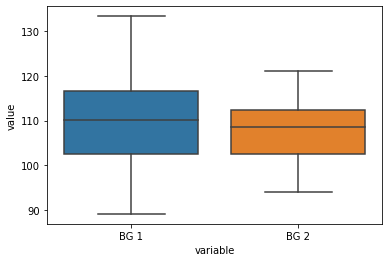

In [15]:
sns.boxplot(x='variable', y='value', data=df_melted)
plt.show()